In [ ]:
#Importar las librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
#Importar los datos necesarios

datos = pd.read_csv("Variables_1_Gusta_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.head()

In [ ]:
#Toma variables X excluyendo actividad riesgo

X = datos.iloc[:,1:23]

#Toma variable Y

Y = datos.iloc[:,0:1]

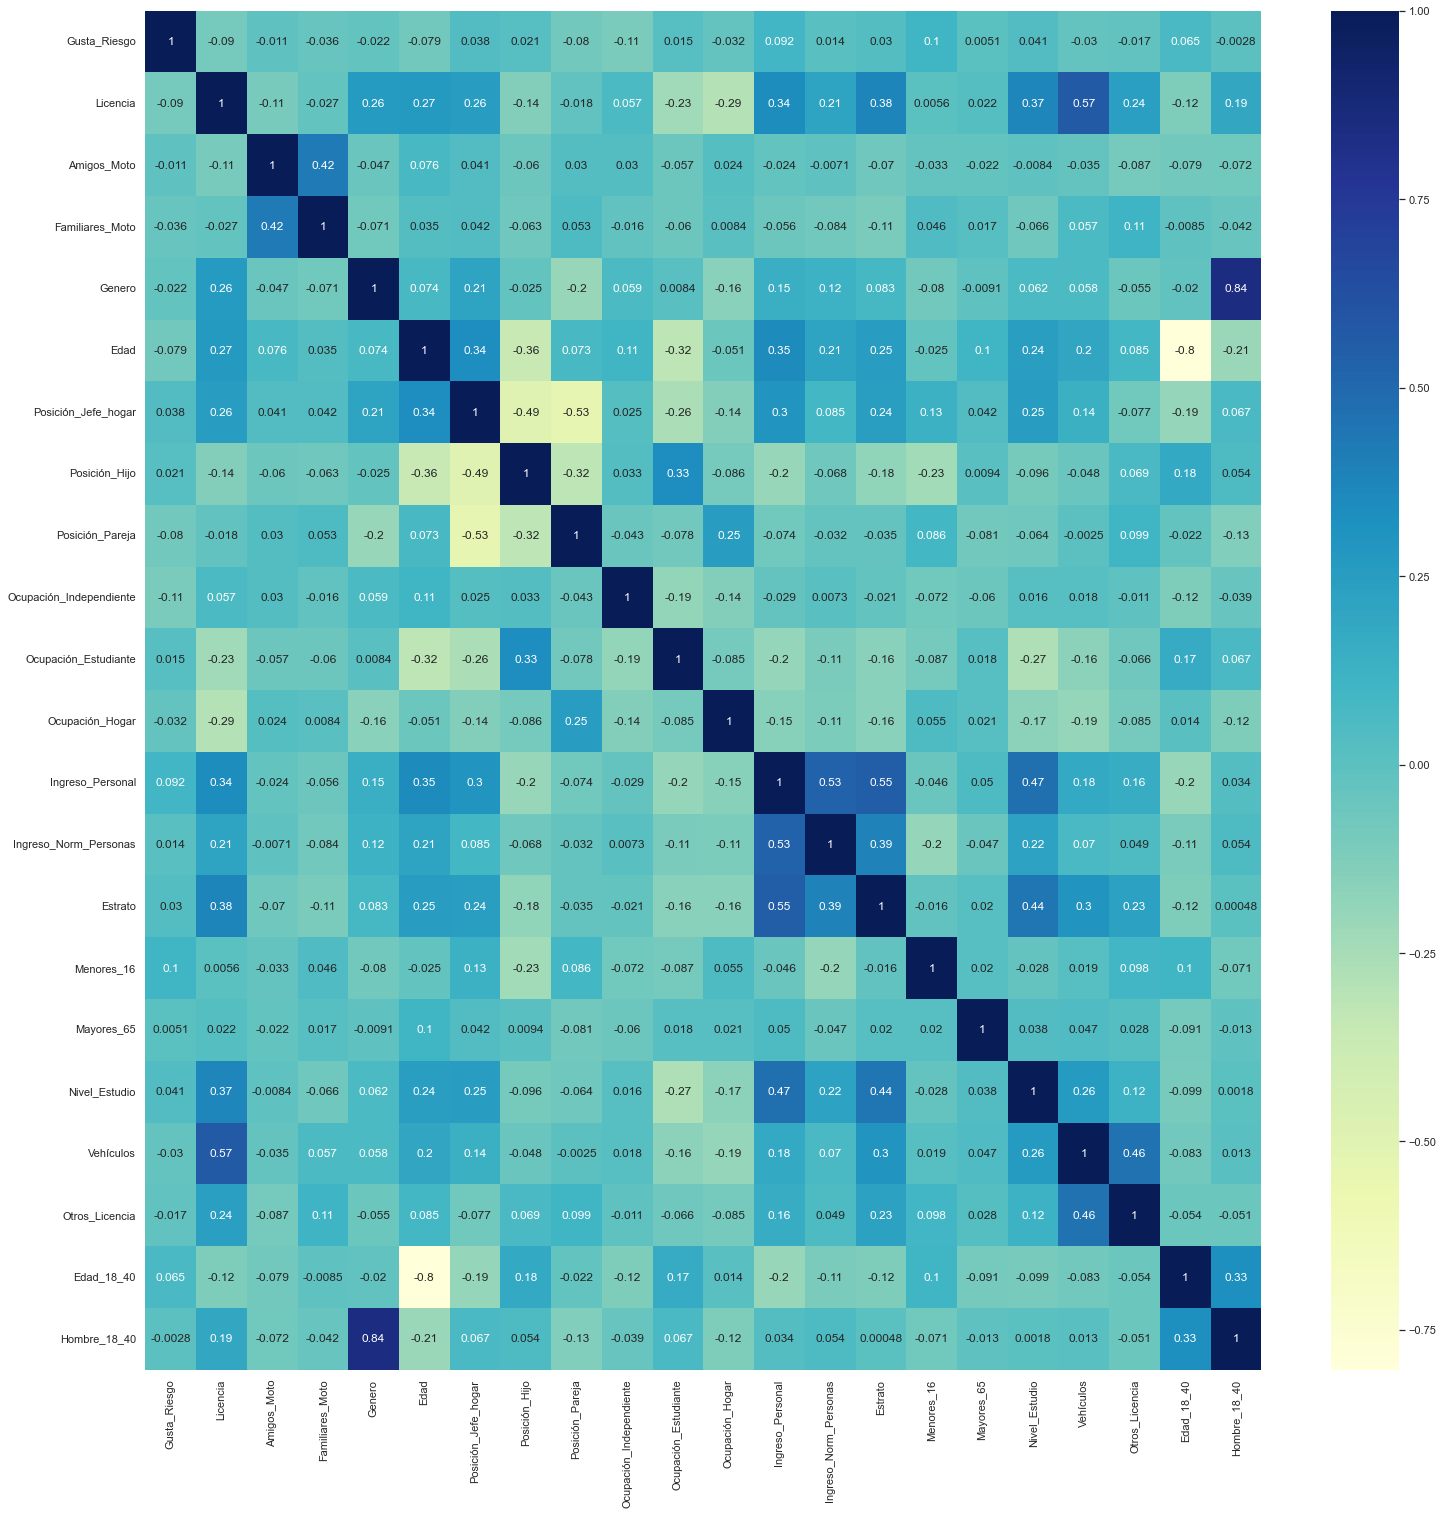

In [8]:
#Calcula la matriz de correlación 

Correl = datos.corr() #Matriz correlación método dataframe

#Mapa de color para identificar correlaciones

sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(Correl,annot=True, cmap='YlGnBu')
plt.savefig("Matriz_Correlación_Y1.jpg")

In [6]:
#Análisis de multicolinealidad utilizando el factor de inflación de la varianza
#Siempre que sea mayor a 5 significa colinealidad alta

VIF_ = []
Columnas = list(X.columns)

Correlacionadas = []

for i in range(len(Columnas)-1): 
    
    X = datos.iloc[:,1:33]
    
    Y_=datos.iloc[:,1+i:2+i]
    
    X.pop(Columnas[i])
    
    x_train = X.values
    y_train = Y_.values
       
    model = LinearRegression()
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_train)
    
    VIF = 1/(1-metrics.r2_score(y_train, y_pred))
    
    VIF_.append(VIF)
    
    if VIF>8: 
        
        Correlacionadas.append(Columnas[i])
                 
print(Correlacionadas)

#En evaluación anterior se encuentra correlación entre ocupación independiente y dependiente por lo que se retira 1. 
#Se encuentra correlación entre posiciones del hogar así que se retira posición pareja porque no aparece en literatural

['Genero', 'Posición_Jefe_hogar']


In [7]:
datos.pop("Hombre_18_40")
datos.pop("Edad_18_40")

datos_trabajo = datos

In [8]:
#Análisis de multicolinealidad utilizando el factor de inflación de la varianza
#Siempre que sea mayor a 5 significa colinealidad alta

VIF_ = []
Columnas = list(X.columns)

Correlacionadas = []

for i in range(len(Columnas)-1): 
    
    X = datos.iloc[:,1:33]
    
    Y_=datos.iloc[:,1+i:2+i]
    
    X.pop(Columnas[i])
    
    x_train = X.values
    y_train = Y_.values
       
    model = LinearRegression()
    
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_train)
    
    VIF = 1/(1-metrics.r2_score(y_train, y_pred))
    
    VIF_.append(VIF)
    
    if VIF>5: 
        
        Correlacionadas.append(Columnas[i])
                 
print(Correlacionadas)

#En evaluación anterior se encuentra correlación entre ocupación independiente y dependiente por lo que se retira 1. 
#Se encuentra correlación entre posiciones del hogar así que se retira posición pareja porque no aparece en literatural

['Posición_Jefe_hogar']


# Backward - Edad

In [9]:
X = datos_trabajo.iloc[:,1:29]

x_train = X
y_train = Y.values

In [10]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=(1,X.shape[1]), forward=False, cv=10)
sfs = sfs.fit(x_train,y_train)

In [11]:
print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

('Licencia', 'Posición_Pareja', 'Ocupación_Independiente', 'Menores_16', 'Nivel_Estudio')
5


-0.009505780755033954


Text(0.5, 1.0, 'Sequential Feature Selection')

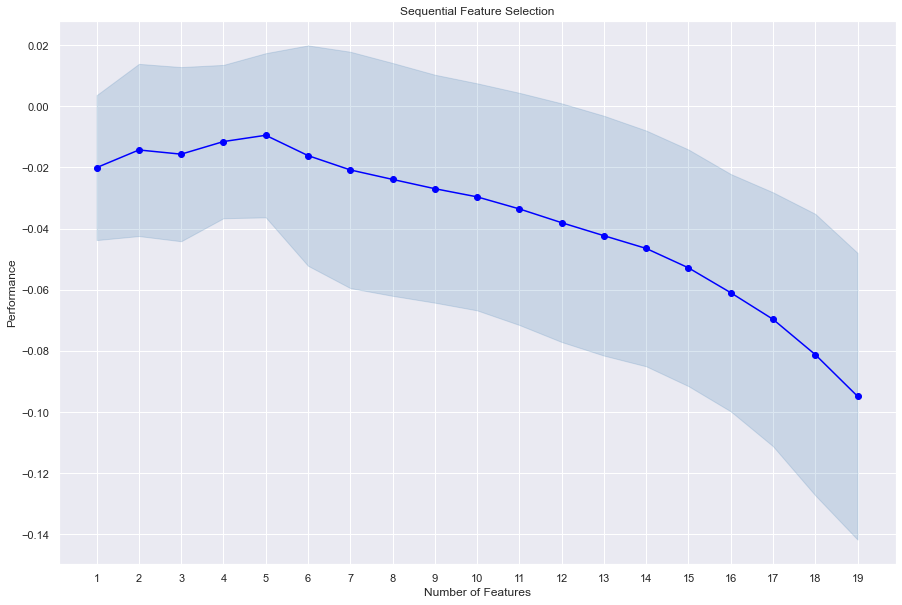

In [12]:
print(sfs.k_score_)

sns.set(rc = {'figure.figsize':(15,10)})

fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

plt.savefig("Optimizacion_Y1.jpg")

In [13]:
X = datos[list(sfs.k_feature_names_)]

In [14]:
x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

In [15]:
#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.0423
mse:  1.4528


In [16]:
#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [17]:
#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q   Max
1.9965 2.6291  2.8045 3.0003 3.317


Coefficients:
                         Estimate  Std. Error  t value   p value
_intercept               2.652146    0.208150  12.7415  0.000000
Licencia                -0.316768    0.137336  -2.3065  0.021571
Posición_Pareja         -0.252923    0.134184  -1.8849  0.060139
Ocupación_Independiente -0.281800    0.138886  -2.0290  0.043094
Menores_16               0.273272    0.118809   2.3001  0.021935
Nivel_Estudio            0.097908    0.035236   2.7786  0.005705
---
R-squared:  0.04226,    Adjusted R-squared:  0.03064
F-statistic: 3.64 on 5 features


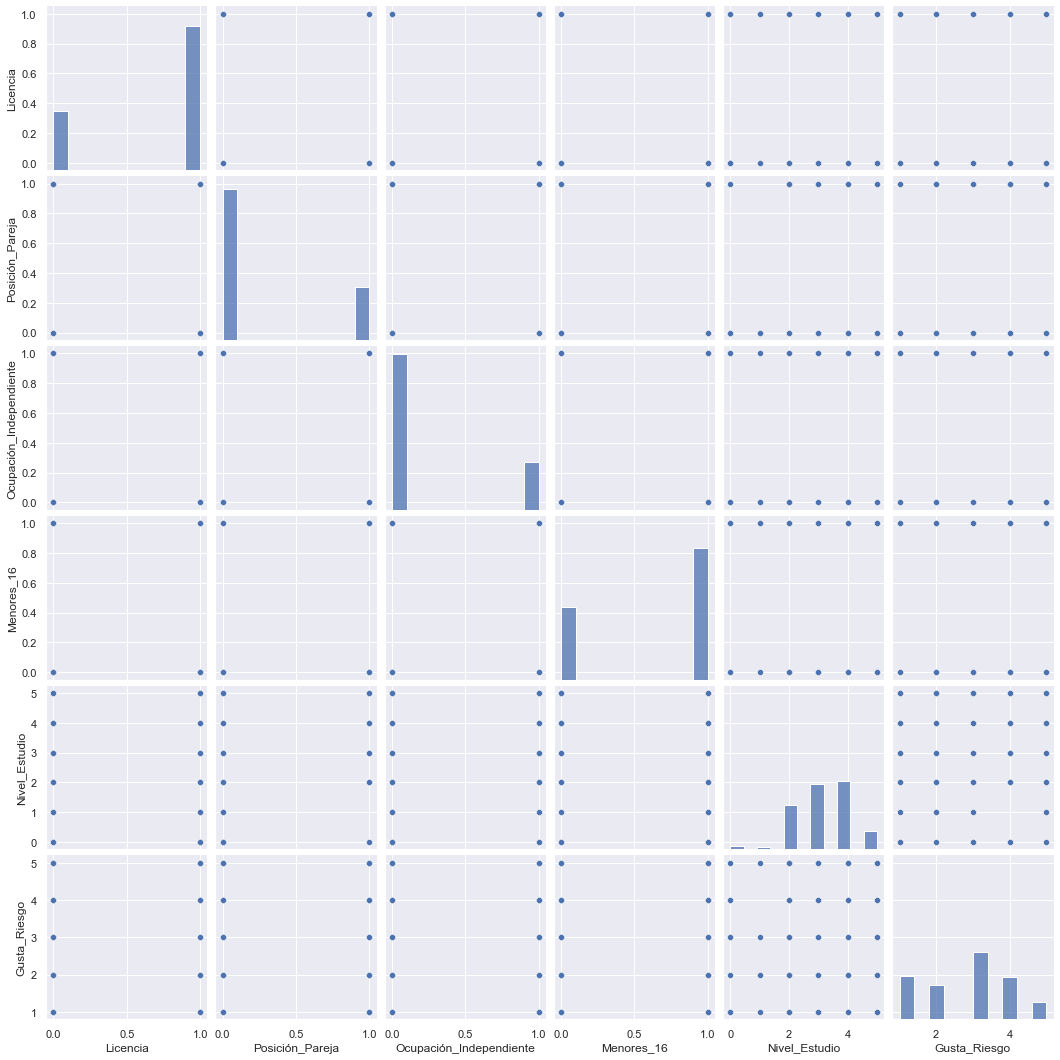

In [18]:
Res=datos[['Licencia', 'Posición_Pareja', 'Ocupación_Independiente', 'Menores_16', 'Nivel_Estudio','Gusta_Riesgo']]
sns.pairplot(Res,height=2.5)

# Backward - Edad_18_40

In [19]:
datos = pd.read_csv("Variables_1_Gusta_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Hombre_18_40")
datos.pop("Edad")
datos.head()

,Gusta_Riesgo,Licencia,Amigos_Moto,Familiares_Moto,Genero,Posición_Jefe_hogar,Posición_Hijo,Posición_Pareja,Ocupación_Independiente,Ocupación_Estudiante,Ocupación_Hogar,Ingreso_Personal,Ingreso_Norm_Personas,Estrato,Menores_16,Mayores_65,Nivel_Estudio,Vehículos,Otros_Licencia,Edad_18_40
0,4,0,1,1,0,1,0,0,1,0,0,0.500,0.166000,1,1,0,0,0,0,1
1,4,0,1,0,1,0,1,0,0,0,0,0.500,0.437500,1,1,0,3,0,0,1
2,1,0,0,0,0,0,0,0,0,0,1,1.164,0.600000,1,1,0,3,1,1,1
3,3,0,1,1,0,0,0,0,0,0,0,0.664,0.388000,1,1,0,3,0,0,1
4,3,1,1,1,0,0,1,0,0,0,0,1.164,0.291667,1,1,0,2,1,1,1


In [20]:
X = datos_trabajo.iloc[:,1:29]

x_train = X
y_train = Y.values

In [21]:
model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=6, forward=False,cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

('Licencia', 'Posición_Pareja', 'Ocupación_Independiente', 'Ingreso_Personal', 'Menores_16', 'Nivel_Estudio')
6
-0.016146595835164323


Text(0.5, 1.0, 'Sequential Feature Selection')

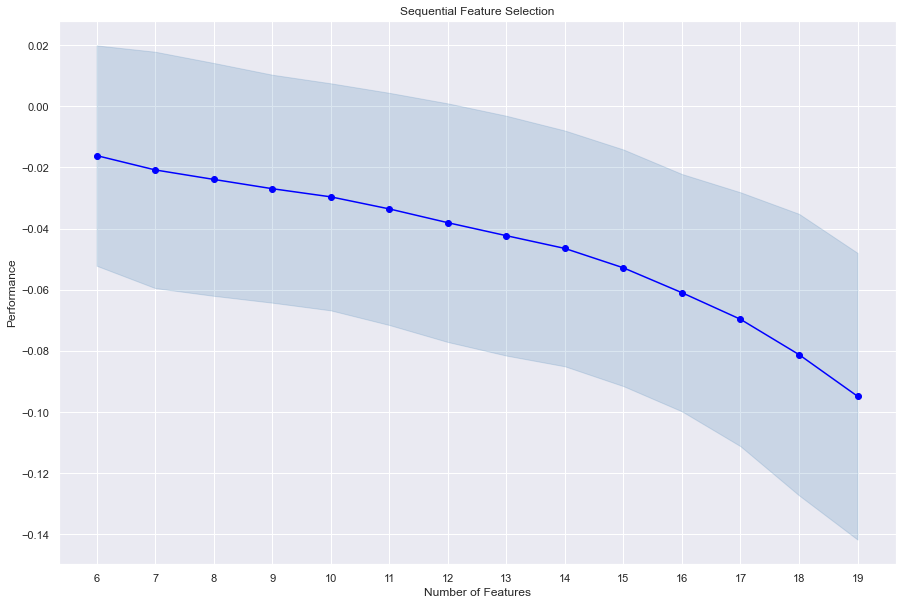

In [22]:
fig=plot_sfs(sfs.get_metric_dict(),kind='std_err')

plt.title('Sequential Feature Selection')

In [23]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0529
mse:  1.4367
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q    Max
2.0411 2.5875  2.8098 2.9632 3.7017


Coefficients:
                         Estimate  Std. Error  t value   p value
_intercept               2.711290    0.208541  13.0013  0.000000
Licencia                -0.381919    0.140031  -2.7274  0.006653
Posición_Pareja         -0.237824    0.133658  -1.7793  0.075912
Ocupación_Independiente -0.264090    0.138347  -1.9089  0.056962
Ingreso_Personal         0.072661    0.030291   2.3988  0.016887
Menores_16               0.284291    0.118332   2.4025  0.016720
Nivel_Estudio            0.043229    0.041700   1.0367  0.300497
---
R-squared:  0.05287,    Adjusted R-squared:  0.03905
F-statistic: 3.82 on 6 features


r2  0.0519
mse:  1.4382
=====================================Summary=====================================
Residuals:
   Min    1Q  Median     3Q    Max
2.0496 2.596  2.8369 2.9544 3.7168


Coefficients:
                         Estimate  Std. Error  t value   p value
_intercept               2.817325    0.130803  21.5388  0.000000
Licencia                -0.358378    0.130490  -2.7464  0.006286
Posición_Pareja         -0.240945    0.133263  -1.8080  0.071320
Ocupación_Independiente -0.262889    0.137704  -1.9091  0.056938
Ingreso_Personal         0.081194    0.025713   3.1577  0.001706
Menores_16               0.283473    0.115289   2.4588  0.014346
---
R-squared:  0.05189,    Adjusted R-squared:  0.04038
F-statistic: 4.51 on 5 features


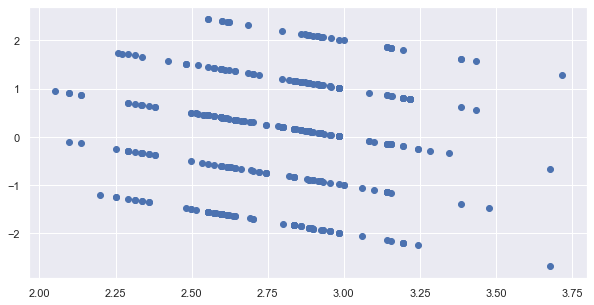

In [24]:
# Retirando aquellos por encima de 0.1

X.pop("Nivel_Estudio")

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

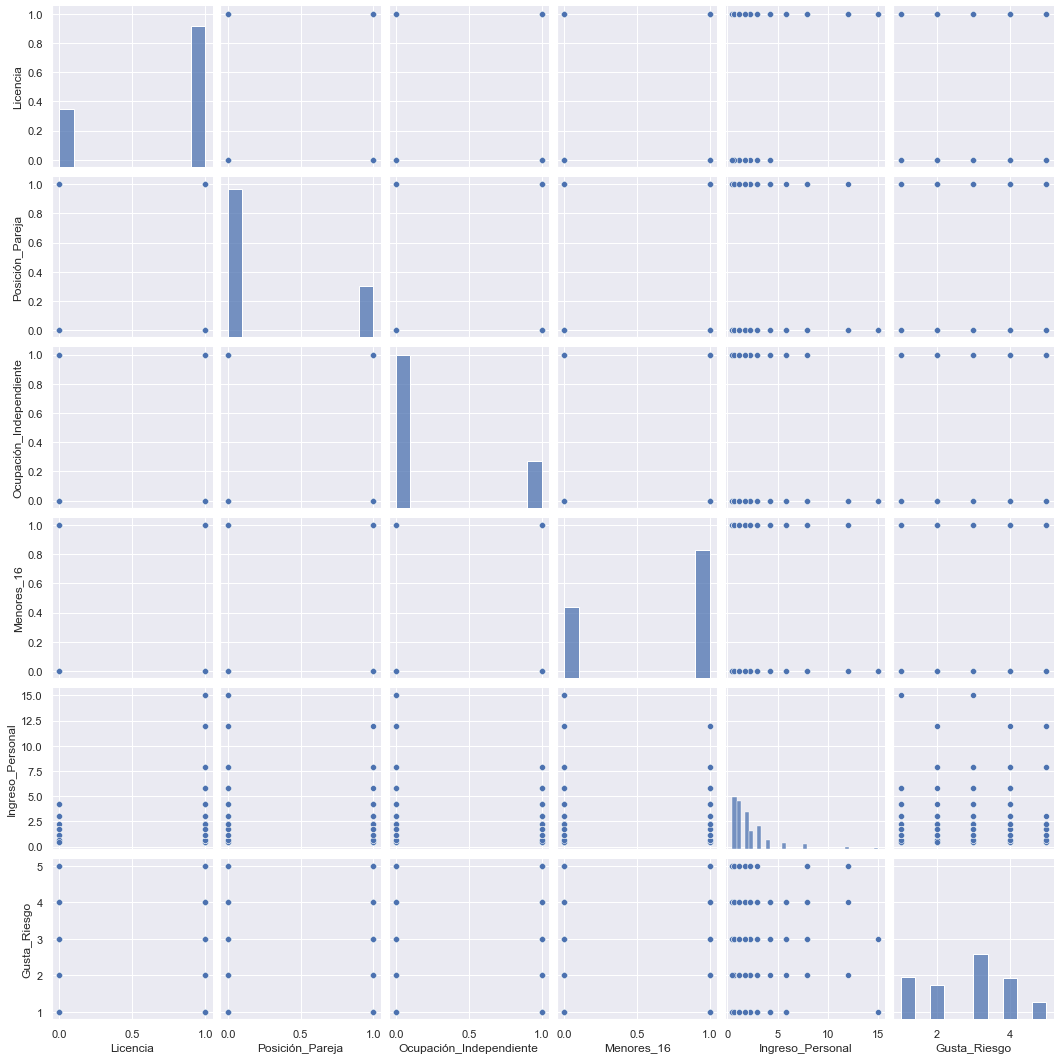

In [25]:
Res=datos[['Licencia', 'Posición_Pareja', 'Ocupación_Independiente', 'Menores_16', 'Ingreso_Personal','Gusta_Riesgo']]
sns.pairplot(Res,height=2.5)

# Forward - Hombre_18_40

In [26]:
datos = pd.read_csv("Variables_1_Gusta_Riesgo.csv",delimiter=";")
datos.pop("respondent_id") #Se eliminó la respondent id porque no es relevante
datos.pop("Edad_18_40")
datos.pop("Edad")
datos.head()

X = datos.iloc[:,1:29]

x_train = X
y_train = Y.values

model = LinearRegression()

sfs = SequentialFeatureSelector(model, k_features=(1,X.shape[1]), forward=True, cv=10)
sfs = sfs.fit(x_train,y_train)

print(sfs.k_feature_names_)
print(len(sfs.k_feature_names_))

print(sfs.k_score_)

('Licencia', 'Posición_Pareja', 'Ocupación_Independiente', 'Menores_16', 'Nivel_Estudio')
5
-0.009505780755033954


In [27]:
X = datos[list(sfs.k_feature_names_)]

x_train = X.values
y_train = Y.values

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_train)

#Métricas 

mse = metrics.mean_squared_error(y_train,y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

#Coeficientes de ajuste

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

#Estadísticos de prueba

print("=====================================Summary=====================================")

stats.summary(model, x_train, y_train.reshape(-1), X.columns)

r2  0.0423
mse:  1.4528
=====================================Summary=====================================
Residuals:
   Min     1Q  Median     3Q   Max
1.9965 2.6291  2.8045 3.0003 3.317


Coefficients:
                         Estimate  Std. Error  t value   p value
_intercept               2.652146    0.208150  12.7415  0.000000
Licencia                -0.316768    0.137336  -2.3065  0.021571
Posición_Pareja         -0.252923    0.134184  -1.8849  0.060139
Ocupación_Independiente -0.281800    0.138886  -2.0290  0.043094
Menores_16               0.273272    0.118809   2.3001  0.021935
Nivel_Estudio            0.097908    0.035236   2.7786  0.005705
---
R-squared:  0.04226,    Adjusted R-squared:  0.03064
F-statistic: 3.64 on 5 features
